<a href="https://colab.research.google.com/github/naga-dheeraj-p/Machine_LEARNING_projects/blob/main/TASK_1_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1:**

**K Means Clustering**

In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/sample_data/train - train.csv')
data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


**Interquartile Range (IQR) method for outlier detection and removal:**

*The Interquartile Range (IQR) method identifies outliers by computing the range between the first and third quartiles of a dataset and removing data points lying beyond a specified threshold from this range.*

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('/content/sample_data/train - train.csv')
data_numeric = data.select_dtypes(include=[np.number])
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_mask = ((data_numeric < lower_bound) | (data_numeric > upper_bound)).any(axis=1)
cleaned_data = data.drop(data.index[outliers_mask])
outliers_count = outliers_mask.sum()
print("Number of outliers detected:", outliers_count)

Number of outliers detected: 5430


**DATA PRE-PROCESSING**:
*Principal Component Analysis (PCA)*

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
pca=PCA(0.9)
x_pca=pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.37886498, 0.19072031, 0.07363578, 0.05728706, 0.0403135 ,
       0.03052076, 0.02938465, 0.02646377, 0.02329883, 0.02203835,
       0.02011524, 0.01912335])

**LABEL ENCODING AND ELBOW POINT GRAPH**

I have encoded the target column using LabelEncoder to convert categorical target values into numerical labels and then I dropped the original target column from the dataset.
And then I used elbow method to determine the optimal number of clusters for K Means by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters and identifying the "Elbow point" where the rate of decrease in WCSS slows down.

   T1  T2  T3  T4  T5  T6  T7  T8  T9  T10  T11  T12  T13  T14  T15  T16  T17  \
0 -70 -61 -66 -53 -51 -63 -82 -57 -76  -78  -66  -66  -61  -59  -73  -75  -63   
1 -77 -74 -71 -76 -65 -63 -66 -52 -55  -75  -72  -75  -74  -61  -64  -63  -53   
4 -67 -69 -65 -63 -59 -53 -70 -72 -71  -60  -61  -57  -54  -76  -61  -66  -71   
5 -63 -68 -63 -66 -68 -54 -60 -53 -50  -56  -68  -72  -59  -57  -58  -52  -48   
6 -68 -69 -65 -70 -56 -51 -63 -69 -71  -66  -65  -62  -54  -56  -54  -68  -61   

   T18  target_encoded  
0  -77              98  
1  -63             124  
4  -80              24  
5  -52              67  
6  -65              31  


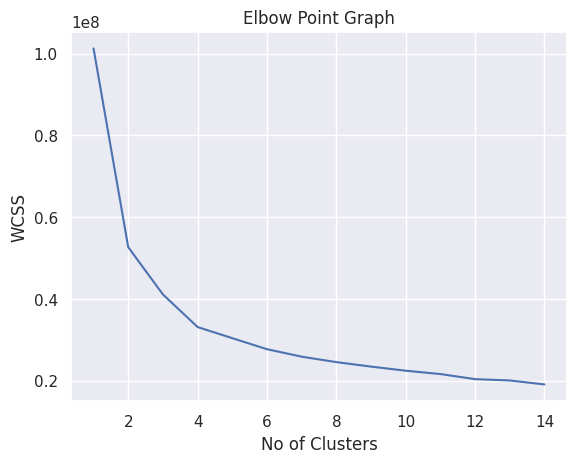

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

#data = pd.read_csv('/content/sample_data/train - train.csv')
data=cleaned_data

target_column = data['target']
label_encoder = LabelEncoder()
data['target_encoded'] = label_encoder.fit_transform(target_column)
data.drop(columns=['target'], inplace=True)
print(data.head())

wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1, 15), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()


*After plotting the elbow point graph, I selected k=5 because the rate of decrease in within-cluster sum of squares (WCSS) slowed down significantly after that point.*

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#data=pd.read_csv('/content/sample_data/train - train.csv')
data=cleaned_data

target_column = data['target']
label_encoder = LabelEncoder()
data['target_encoded'] = label_encoder.fit_transform(target_column)
data.drop(columns=['target'], inplace=True)

k=5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=60,n_init=10)
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
data['Cluster'] = kmeans.fit_predict(x)


x_train, x_test, y_train, y_test = train_test_split(x, data['Cluster'], test_size=0.2, random_state=60)

model = RandomForestClassifier(random_state=60)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",round(accuracy*100,2),'%')
print(y_pred)

x_test_new=pd.read_csv('/content/sample_data/test - test.csv')
y_pred_new = model.predict(x_test_new)

print("Predicted Target Values for Test Data:")
print(y_pred_new)

Accuracy:  99.19 %
[2 1 3 ... 0 2 2]
Predicted Target Values for Test Data:
[1 0 1 ... 1 3 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


**To identify to which cluster a given data point belongs to:**

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler


input_data = np.array([-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63])
input_data_reshaped = input_data.reshape(1, -1)

scaler = StandardScaler()
scaler.fit(input_data_reshaped)
input_data_scaled = scaler.transform(input_data_reshaped)

predictions = model.predict(input_data_scaled)
print("Cluster to which the given input belongs to is:", predictions)


Cluster to which the given input belongs to is: [4]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data=pd.read_csv('/content/sample_data/train - train.csv')
k=5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=60,n_init=10)
x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values
data['Cluster'] = kmeans.fit_predict(x)


x_train, x_test, y_train, y_test = train_test_split(x, data['Cluster'], test_size=0.2, random_state=60)

model = RandomForestClassifier(random_state=60)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",round(accuracy*100,2),'%')
print(y_pred)

Accuracy:  99.17 %
[2 4 3 ... 2 4 3]
